# Persona Overview
Explorative Notebook fuer erste Einblicke in die Persona-Datensaetze. Laedt die Daten ueber das Analyse-Modul und zeigt einige Standard-Plots.

In [1]:
import sys
from pathlib import Path

project_root = Path.cwd()
analysis_src = project_root / 'apps' / 'analysis' / 'src'
if str(analysis_src) not in sys.path:
    sys.path.append(str(analysis_src))

from analysis.persona.analytics import (
    PersonaDataConfig,
    load_persona_dataframe,
    plot_age_distribution,
    plot_category_distribution,
)

config = PersonaDataConfig.from_iterable([12, 13, 14, 15, 16])
df = load_persona_dataframe(config)
df.head()

,persona_uuid,gen_id,age,gender,education,occupation,marriage_status,migration_status,religion,sexuality,created_at,origin_country_en,origin_country_de,origin_region,origin_subregion
0,a753f391-a20e-40d5-9b56-48d937273b72,12,26,male,Noch in schulischer Ausbildung,Arzt/Ärztin,married,without_migration,Muslims,heterosexual,2025-09-10 17:42:39.492560,Germany,Deutschland,Europe,Western Europe
1,f91a6181-d3f1-475b-90fa-569af040fabd,12,51,female,Haupt- (Volks-)schulabschluss,Informatiker/in,married,with_migration,Christians,heterosexual,2025-09-10 17:42:39.492574,Ukraine,Ukraine,Europe,Eastern Europe
2,51495675-ae06-4ae0-8c85-915b6e1551a3,12,26,male,Noch in schulischer Ausbildung,Arzt/Ärztin,single,without_migration,Christians,heterosexual,2025-09-10 17:42:39.492583,Germany,Deutschland,Europe,Western Europe
3,cd49fbfd-0206-442b-ab43-7662ed47e2be,12,58,female,Haupt- (Volks-)schulabschluss,Krankenpfleger/in,divorced,without_migration,Christians,heterosexual,2025-09-10 17:42:39.492590,Germany,Deutschland,Europe,Western Europe
4,007653e6-569b-473a-86da-028276d66e48,12,18,male,Noch in schulischer Ausbildung,Verkäufer/in,single,without_migration,Religiously_unaffiliated,heterosexual,2025-09-10 17:42:39.492601,Germany,Deutschland,Europe,Western Europe


<Axes: title={'center': 'Age distribution by gen_id'}, xlabel='Age', ylabel='Share'>

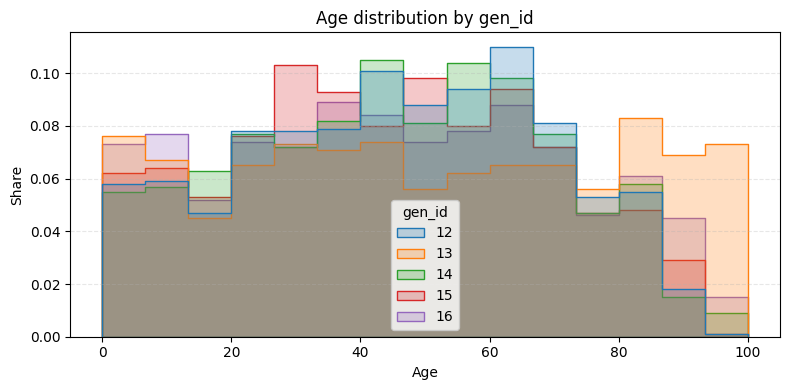

In [2]:
plot_age_distribution(df)

<Axes: title={'center': 'Distribution of Gender'}, xlabel='Gender', ylabel='Share'>

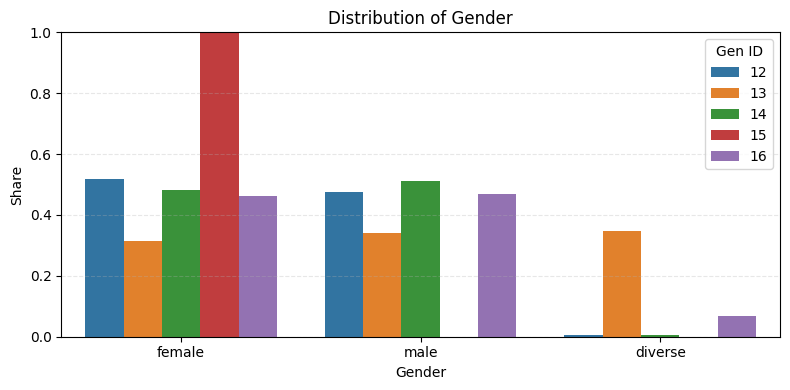

In [3]:
plot_category_distribution(df, "gender")

In [4]:
import analysis, inspect; print(analysis.__file__)

/home/markus/projects/Social-Bias-Benchmark/apps/analysis/src/analysis/__init__.py


In [5]:
from shared.storage.db import get_db; print(get_db())

In [6]:
from analysis.persona.analytics import make_region_choropleth, make_country_share_choropleth
#fig = make_region_choropleth(df); fig.show()
fig = make_country_share_choropleth(df, normalize='per_gen_p95', vmax_percentile=0.9)
fig.show()